In [1]:

import pandas as pd

# Load data
bookings = pd.read_csv('../dataset/bookings_train.csv')
tasks = pd.read_csv('../dataset/tasks.csv')
staffing = pd.read_csv('../dataset/staffing_train.csv')

# Merge bookings with tasks to get section_id
bookings = bookings.merge(tasks[['task_id', 'section_id']], on='task_id', how='left')

# Aggregate bookings by date and section
agg = bookings.groupby(['appointment_date', 'section_id']).agg(
    num_bookings=('booking_id', 'count'),
    total_documents=('num_documents', 'sum'),
    avg_satisfaction=('satisfaction_rating', 'mean')
).reset_index()

# Merge with staffing data
staffing['date'] = pd.to_datetime(staffing['date'])
agg['appointment_date'] = pd.to_datetime(agg['appointment_date'])
merged = staffing.merge(
    agg, left_on=['date', 'section_id'], right_on=['appointment_date', 'section_id'], how='left'
)

# Now you can use merged for ARIMA or other time series models

In [2]:
merged.head()

,date,section_id,employees_on_duty,total_task_time_minutes,appointment_date,num_bookings,total_documents,avg_satisfaction
0,2021-01-01,SEC-001,1,834.569483,2021-01-01,13,18,4.153846
1,2021-01-01,SEC-002,4,1525.368990,2021-01-01,35,106,4.342857
2,2021-01-01,SEC-003,2,662.095279,2021-01-01,21,51,4.047619
3,2021-01-01,SEC-004,4,1499.112620,2021-01-01,32,64,4.312500
4,2021-01-01,SEC-005,3,1238.533073,2021-01-01,23,56,4.086957


In [3]:
merged.isnull().sum()

date                       0
section_id                 0
employees_on_duty          0
total_task_time_minutes    0
appointment_date           0
num_bookings               0
total_documents            0
avg_satisfaction           0
dtype: int64

In [4]:
# Install matplotlib
# %pip install matplotlib
# %pip install statsmodels

/tmp/ipykernel_105861/995548404.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  section_df['employees_on_duty'] = section_df['employees_on_duty'].fillna(method='ffill')


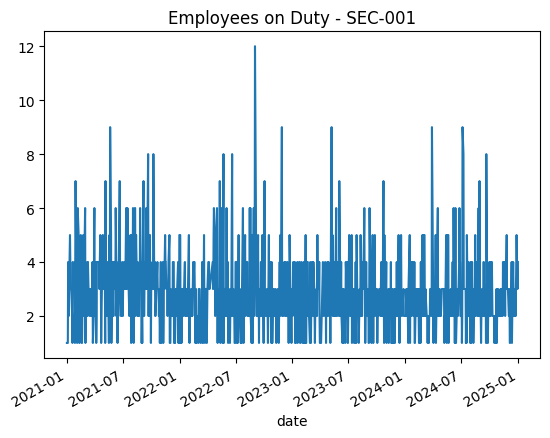

/home/kavindudh/competitions/TeamInception_Datathon/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kavindudh/competitions/TeamInception_Datathon/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kavindudh/competitions/TeamInception_Datathon/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/kavindudh/competitions/TeamInception_Datathon/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/t

Next 7 days forecast:
967    2.774687
968    2.731160
969    2.729614
970    2.729559
971    2.729557
972    2.729557
973    2.729557
Name: predicted_mean, dtype: float64


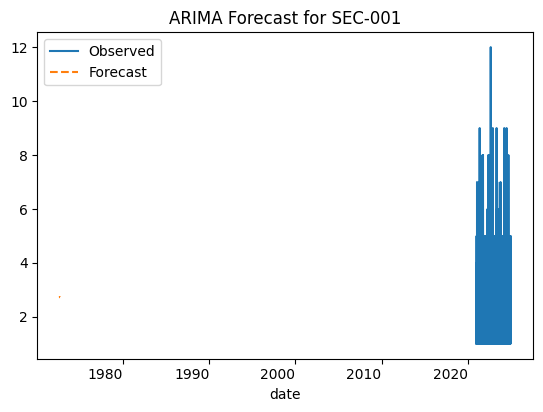

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Filter for a specific section (e.g., SEC-001)
section_id = 'SEC-001'
section_df = merged[merged['section_id'] == section_id].sort_values('date')

# Set date as index
section_df = section_df.set_index('date')

# Fill missing values (if any)
section_df['employees_on_duty'] = section_df['employees_on_duty'].fillna(method='ffill')

# Plot to visualize
section_df['employees_on_duty'].plot(title=f'Employees on Duty - {section_id}')
plt.show()

# Fit ARIMA model (order can be tuned)
model = ARIMA(section_df['employees_on_duty'], order=(1,1,1))
model_fit = model.fit()

# Forecast next 7 days
forecast = model_fit.forecast(steps=7)
print("Next 7 days forecast:")
print(forecast)

# Plot forecast
plt.figure()
section_df['employees_on_duty'].plot(label='Observed')
forecast.plot(label='Forecast', style='--')
plt.legend()
plt.title(f'ARIMA Forecast for {section_id}')
plt.show()